In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("two_way_mixed.csv")
df

,id,group,time,score
0,1,grp1,t1,14.1
1,2,grp1,t1,14.5
2,3,grp1,t1,15.7
3,4,grp1,t1,16.0
4,5,grp1,t1,16.5
...,...,...,...,...
130,41,grp3,t3,14.3
131,42,grp3,t3,13.8
132,43,grp3,t3,15.4
133,44,grp3,t3,15.1


## Summary Statistics

In [3]:
stats = df.groupby(['time', 'group'])['score'].agg(['count', 'std', 'mean'])
stats

count       std       mean
time group                            
t1   grp1      15  1.628701  17.086667
     grp2      15  1.565643  16.646667
     grp3      15  1.321183  17.013333
t2   grp1      15  1.695990  16.926667
     grp2      15  1.694810  16.466667
     grp3      15  1.389176  15.013333
t3   grp1      15  1.556308  16.506667
     grp2      15  1.702715  15.526667
     grp3      15  1.422674  13.560000

## Boxplot

<AxesSubplot:xlabel='time', ylabel='score'>

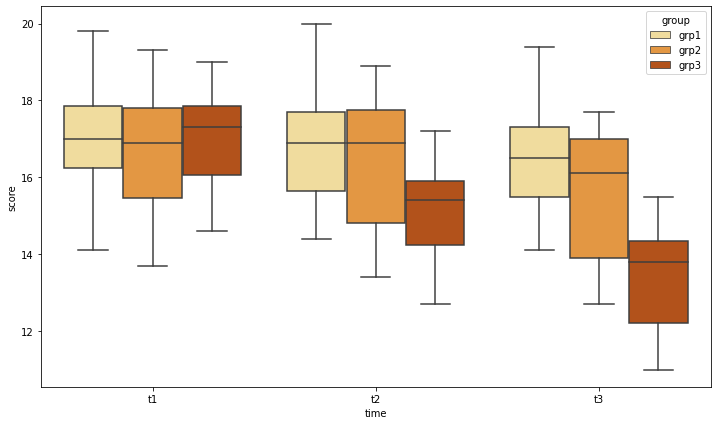

In [4]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='time', y='score', hue='group', palette="YlOrBr", data=df)

## Interaction plot using Seaborn

<AxesSubplot:xlabel='time', ylabel='score'>

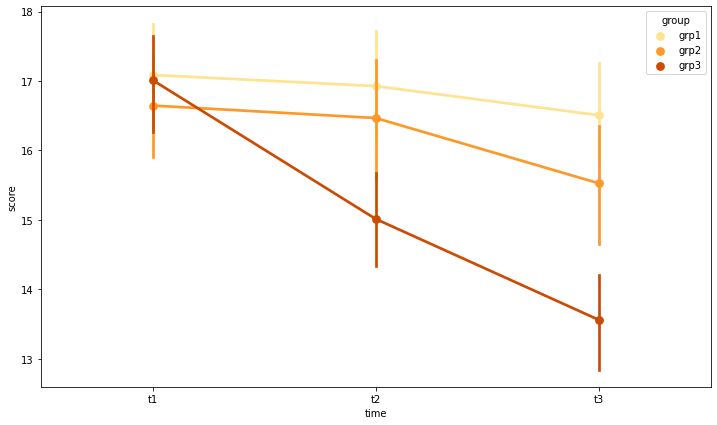

In [5]:
plt.figure(figsize=(12, 7))
ax = sns.pointplot(x='time', y='score', hue='group', palette="YlOrBr", data=df)
ax

# Assumptions

### Outliers

In [6]:
def outliers(dep, ind1, ind2):
    dicts = {'Outliers':{}}
    for cat_ind1 in pd.unique(df[ind1]):
        for cat_ind2 in pd.unique(df[ind2]):
            Q1, Q3 = np.percentile(df[dep][df[ind1] == cat_ind1][df[ind2] == cat_ind2], [25,75])
            IQR = Q3-Q1
            lower_fence, upper_fence= Q1-(1.5*IQR), Q3+(1.5*IQR)
            new_dataset = []
            for i in df[dep][df[ind1] == cat_ind1][df[ind2] == cat_ind2]:
                if i < lower_fence or i > upper_fence:
                    new_dataset.append(i)
            dicts['Outliers'][f'{cat_ind1} and {cat_ind2}'] = new_dataset
    return pd.DataFrame(dicts)

In [7]:
outliers('score', 'time', 'group')

,Outliers
t1 and grp1,[]
t1 and grp2,[]
t1 and grp3,[]
t2 and grp1,[]
t2 and grp2,[]
t2 and grp3,[]
t3 and grp1,[]
t3 and grp2,[]
t3 and grp3,[]


### Normality

In [8]:
def shapiro(dep, ind1, ind2):
    normality = {'Shapiro':{}}
    import scipy.stats as stats
    for cat_ind1 in pd.unique(df[ind1]):
        for cat_ind2 in pd.unique(df[ind2]):
            result = stats.shapiro(df[dep][df[ind1] == cat_ind1][df[ind2] == cat_ind2])
            normality['Shapiro'][f'{cat_ind1} and {cat_ind2}'] = result
    return pd.DataFrame(normality)

In [9]:
shapiro('score', 'time', 'group')

,Shapiro
t1 and grp1,"(0.9644383788108826, 0.7689103484153748)"
t1 and grp2,"(0.9774364829063416, 0.9489769339561462)"
t1 and grp3,"(0.9539227485656738, 0.5882005095481873)"
t2 and grp1,"(0.956050455570221, 0.6241587996482849)"
t2 and grp2,"(0.9354257583618164, 0.3283153176307678)"
t2 and grp3,"(0.9521172642707825, 0.5583949685096741)"
t3 and grp1,"(0.9488298892974854, 0.5062145590782166)"
t3 and grp2,"(0.9090954065322876, 0.13115331530570984)"
t3 and grp3,"(0.9253666400909424, 0.23242171108722687)"


### Homogneity of variance

In [10]:
# if normality exists then perform bartlett otherwise levene's tests

In [11]:
# Null Hypothesis: the variances are equal across all samples/groups
# Alternative Hypothesis:  the variances are not equal across all samples/groups

In [12]:
def homogeneity(dep, ind1, ind2):
    from scipy.stats import bartlett
    import scipy.stats as stats
    combinations = []
    for cat_ind1 in pd.unique(df[ind1]):
        for cat_ind2 in pd.unique(df[ind2]):
            result = df[dep][df[ind1] == cat_ind1][df[ind2] == cat_ind2]
            combinations.append(result)
            
    #for t1
    stat, p = bartlett(combinations[0], combinations[1], combinations[2])
    bt1stat, bt1p = stat, p
    from scipy.stats import levene
    stat, p = levene(combinations[0], combinations[1], combinations[2])
    lt1stat, lt1p = stat, p
    
    #for t2
    stat, p = bartlett(combinations[3], combinations[4], combinations[5])
    bt2stat, bt2p = stat, p
    from scipy.stats import levene
    stat, p = levene(combinations[3], combinations[4], combinations[5])
    lt2stat, lt2p = stat, p
    
    #for t3
    stat, p = bartlett(combinations[6], combinations[7], combinations[8])
    bt3stat, bt3p = stat, p
    from scipy.stats import levene
    stat, p = levene(combinations[6], combinations[7], combinations[8])
    lt3stat, lt3p = stat, p
    
    homo_result = {
            'Bartlett':{
                't1':{'stat':bt1stat, 'p_value':bt1p},
                't2':{'stat':bt2stat, 'p_value':bt2p},
                't3':{'stat':bt3stat, 'p_value':bt3p}
                       },
            'Levene':{
                't1':{'stat':lt1stat, 'p_value':lt1p},
                't2':{'stat':lt2stat, 'p_value':lt2p},
                't3':{'stat':lt3stat, 'p_value':lt3p}
                       }
            }
    
    return pd.DataFrame(homo_result)

In [13]:
homogeneity('score', 'time', 'group')

,Bartlett,Levene
t1,"{'stat': 0.6437984833296359, 'p_value': 0.7247...","{'stat': 0.17592108473631007, 'p_value': 0.839..."
t2,"{'stat': 0.6834578101974951, 'p_value': 0.7105...","{'stat': 0.24867967853042475, 'p_value': 0.780..."
t3,"{'stat': 0.43695653556935116, 'p_value': 0.803...","{'stat': 0.3350585058505854, 'p_value': 0.7171..."


## Homogeneity of covariances assumption

In [14]:
import pingouin as pg

#### Box’s M

In [15]:
pg.box_m(df, dvs=['score'], group='group')

,Chi2,df,pval,equal_cov
box,1.930886,2.0,0.380814,True


## Assumption of sphericity

In [16]:
import pingouin as pg

In [17]:
pg.sphericity(df, dv='score', subject='id',
           within='time')

SpherResults(spher=False, W=0.25915516524091564, chi2=58.06411703215, dof=2, pval=2.463412768629361e-13)

## Two-Way_Mixed ANOVA Computation

In [18]:
from pingouin import mixed_anova
aov = mixed_anova(dv='score', between='group', within='time', subject='id', data=df)
aov

,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,group,61.991704,2,42,30.995852,4.351811,1.916093e-02,NaN,0.171657,NaN,NaN,NaN,NaN
1,time,66.578815,2,84,33.289407,394.909490,1.905584e-43,1.657730e-11,0.903870,0.574434,False,0.259155,2.463413e-13
2,Interaction,37.153630,4,84,9.288407,110.187610,1.384653e-32,NaN,0.839924,NaN,NaN,NaN,NaN


## Post-hoct tests

### Procedure for significant two-way interaction

#### Compute simple main effects of group variable

In [19]:
t1 = df[df['time'] == 't1']
t2 = df[df['time'] == 't2']
t3 = df[df['time'] == 't3']
time = [t1, t2, t3]
name = ['t1', 't2', 't3']

In [20]:
for i, j in zip(time, name):
    print(f'\n{j}:\n\n',  pg.anova(dv="score", between='group', data=i)) 


t1:

   Source  ddof1  ddof2         F     p-unc       np2
0  group      2     42  0.365091  0.696314  0.017088

t2:

   Source  ddof1  ddof2         F     p-unc       np2
0  group      2     42  5.845445  0.005759  0.217744

t3:

   Source  ddof1  ddof2          F     p-unc       np2
0  group      2     42  13.795516  0.000025  0.396474


#### Compute pairwise comparisons

In [21]:
ptest = pg.pairwise_ttests(dv='score', between=['time', 'group'], padjust='bonf', data=df).round(3)
ptest

,Contrast,time,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,time,-,t1,t2,False,True,2.264,88.0,two-sided,0.026,0.078,bonf,2.037,0.473
1,time,-,t1,t3,False,True,4.670,88.0,two-sided,0.000,0.000,bonf,1614.167,0.976
2,time,-,t2,t3,False,True,2.378,88.0,two-sided,0.020,0.059,bonf,2.551,0.497
3,group,-,grp1,grp2,False,True,1.800,88.0,two-sided,0.075,0.226,bonf,0.907,0.376
4,group,-,grp1,grp3,False,True,4.342,88.0,two-sided,0.000,0.000,bonf,526.705,0.908
5,group,-,grp2,grp3,False,True,2.633,88.0,two-sided,0.010,0.030,bonf,4.368,0.550
6,time * group,t1,grp1,grp2,False,True,0.754,28.0,two-sided,0.457,1.000,bonf,0.427,0.268
7,time * group,t1,grp1,grp3,False,True,0.135,28.0,two-sided,0.893,1.000,bonf,0.347,0.048
8,time * group,t1,grp2,grp3,False,True,-0.693,28.0,two-sided,0.494,1.000,bonf,0.413,-0.246
9,time * group,t2,grp1,grp2,False,True,0.743,28.0,two-sided,0.464,1.000,bonf,0.425,0.264


#### Compute simple main effects of time variable

In [22]:
g1 = df[df['group'] == 'grp1']
g2 = df[df['group'] == 'grp2']
g3 = df[df['group'] == 'grp3']
groups = [g1, g2, g3]
name = ['g1', 'g2', 'g3']

In [23]:
for i, j in zip(groups, name):
    print(f'\n{j}:\n\n',  pg.anova(dv="score", between='time', data=i)) 


g1:

   Source  ddof1  ddof2         F     p-unc       np2
0   time      2     42  0.507852  0.605435  0.023612

g2:

   Source  ddof1  ddof2         F     p-unc       np2
0   time      2     42  1.979604  0.150804  0.086146

g3:

   Source  ddof1  ddof2          F         p-unc       np2
0   time      2     42  23.736577  1.266740e-07  0.530585


##### Compute pairwise comparisons

In [24]:
ptest = pg.pairwise_ttests(dv='score', between=['group', 'time'], padjust='bonf', data=df).round(3)
ptest

,Contrast,group,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,group,-,grp1,grp2,False,True,1.800,88.0,two-sided,0.075,0.226,bonf,0.907,0.376
1,group,-,grp1,grp3,False,True,4.342,88.0,two-sided,0.000,0.000,bonf,526.705,0.908
2,group,-,grp2,grp3,False,True,2.633,88.0,two-sided,0.010,0.030,bonf,4.368,0.550
3,time,-,t1,t2,False,True,2.264,88.0,two-sided,0.026,0.078,bonf,2.037,0.473
4,time,-,t1,t3,False,True,4.670,88.0,two-sided,0.000,0.000,bonf,1614.167,0.976
5,time,-,t2,t3,False,True,2.378,88.0,two-sided,0.020,0.059,bonf,2.551,0.497
6,group * time,grp1,t1,t2,False,True,0.264,28.0,two-sided,0.794,1.000,bonf,0.354,0.094
7,group * time,grp1,t1,t3,False,True,0.997,28.0,two-sided,0.327,1.000,bonf,0.501,0.354
8,group * time,grp1,t2,t3,False,True,0.707,28.0,two-sided,0.486,1.000,bonf,0.416,0.251
9,group * time,grp2,t1,t2,False,True,0.302,28.0,two-sided,0.765,1.000,bonf,0.357,0.107


### Procedure for non-significant two-way interaction

#### Compute Main effects

In [25]:
pg.pairwise_ttests(dv='score', within='time', subject='id', padjust='bonf', data=df).round(3)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,time,t1,t2,True,True,5.545,44.0,two-sided,0.0,0.0,bonf,1.1e+04,0.473
1,time,t1,t3,True,True,8.576,44.0,two-sided,0.0,0.0,bonf,1.623e+08,0.976
2,time,t2,t3,True,True,11.118,44.0,two-sided,0.0,0.0,bonf,3.132e+11,0.497


In [26]:
df.pairwise_ttests(dv='score', between=['group'], padjust='bonf').round(3)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,group,grp1,grp2,False,True,1.800,88.0,two-sided,0.075,0.226,bonf,0.907,0.376
1,group,grp1,grp3,False,True,4.342,88.0,two-sided,0.000,0.000,bonf,526.705,0.908
2,group,grp2,grp3,False,True,2.633,88.0,two-sided,0.010,0.030,bonf,4.368,0.550


## Report

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

t2_grp2 vs. t2_grp3: Custom statistical test, P_val:1.430e-01
t3_grp1 vs. t3_grp2: Custom statistical test, P_val:1.000e+00
t3_grp2 vs. t3_grp3: Custom statistical test, P_val:1.700e-02
t1_grp1 vs. t1_grp2: Custom statistical test, P_val:1.000e+00
t1_grp2 vs. t1_grp3: Custom statistical test, P_val:1.000e+00
t2_grp1 vs. t2_grp2: Custom statistical test, P_val:1.000e+00
t3_grp1 vs. t3_grp3: Custom statistical test, P_val:1.000e-04
t2_grp1 vs. t2_grp3: Custom statistical test, P_val:1.900e-02
t1_grp1 vs. t1_grp3: Custom statistical test, P_val:1.000e+00


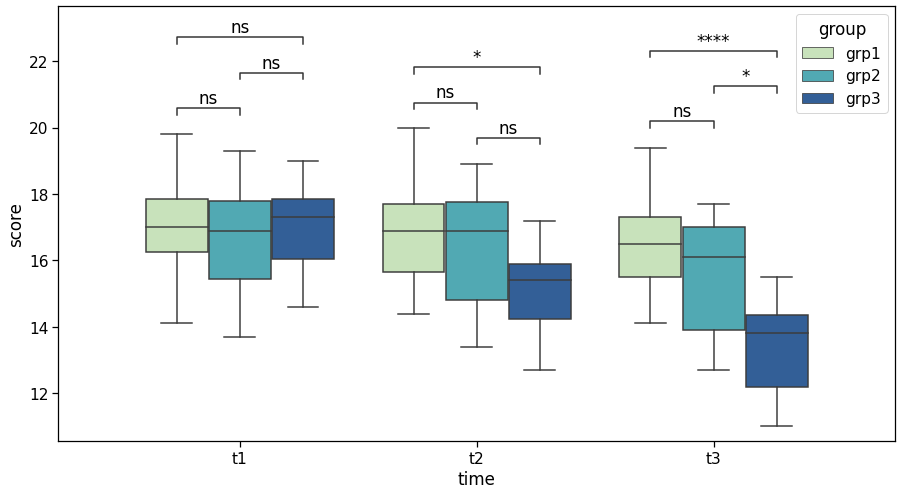

In [27]:
from statannotations.Annotator import Annotator

subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=3)
states_palette = sns.color_palette("YlGnBu", n_colors=3)

states_order = ["grp1", "grp2", "grp3"]
subcat_order = ['t1', 't2', 't3']

pvalues = [1, 1, 1, 1, 0.019, 0.143, 1, 0.0001, 0.017]
# Putting the parameters in a dictionary avoids code duplication
# since we use the same for `sns.boxplot` and `Annotator` calls..

pairs = [
    [('t1', 'grp1'), ('t1', 'grp2')],
    [('t1', 'grp1'), ('t1', 'grp3')],
    [('t1', 'grp2'), ('t1', 'grp3')],
    
    [('t2', 'grp1'), ('t2', 'grp2')],
    [('t2', 'grp1'), ('t2', 'grp3')],
    [('t2', 'grp2'), ('t2', 'grp3')],
    
    [('t3', 'grp1'), ('t3', 'grp2')],
    [('t3', 'grp1'), ('t3', 'grp3')],
    [('t3', 'grp2'), ('t3', 'grp3')],
]

plotting_parameters = {
    'data': df,
    'x': 'time',
    'y': 'score',
    "order": subcat_order,
    "hue": "group",
    "hue_order": states_order,
    "palette": states_palette
}

formatted_pvalues = [f"p={p:.2e}" for p in pvalues]
with sns.plotting_context('notebook', font_scale = 1.4):
    # Create new plot
    # ax = get_log_ax()
    x = "time"
    y = "score"
    order = ['t1', 't2', 't3']
    #ax = sns.boxplot(data=df, x=x, y=y, order=order)

    from matplotlib import pyplot as plt
    plt.figure(figsize=(15,8))
    # Plot with seaborn
    ax = sns.boxplot(**plotting_parameters)

    # Add annotations
    annotator = Annotator(ax, pairs, **plotting_parameters)
    annotator.set_pvalues(pvalues)
    annotator.annotate()

    # Label and show
    # label_plot_for_subcats(ax)
    plt.show()